In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

In [3]:
datos = pd.read_csv('data/train.csv')

In [4]:
datos.columns

Index(['id', 'titulo', 'descripcion', 'tipodepropiedad', 'direccion', 'ciudad',
       'provincia', 'antiguedad', 'habitaciones', 'garages', 'banos',
       'metroscubiertos', 'metrostotales', 'idzona', 'lat', 'lng', 'fecha',
       'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas',
       'centroscomercialescercanos', 'precio'],
      dtype='object')

In [5]:
fechas = pd.to_datetime(datos.fecha)
fechas1 = pd.DataFrame()
fechas1['año'] = fechas.dt.year
fechas1['mes'] = fechas.dt.month
fechas1.head(10)

,año,mes
0,2015,8
1,2013,6
2,2015,10
3,2012,3
4,2016,6
5,2014,3
6,2016,2
7,2016,10
8,2014,1
9,2016,12


In [35]:
fechas1.groupby(['mes', 'año']).agg(np.size).reset_index()

,mes,año,0
0,1,2012,3056
1,1,2013,3986
2,1,2014,4806
3,1,2015,8620
4,1,2016,11550
5,2,2012,2654
6,2,2013,2802
7,2,2014,5068
8,2,2015,7738
9,2,2016,9184


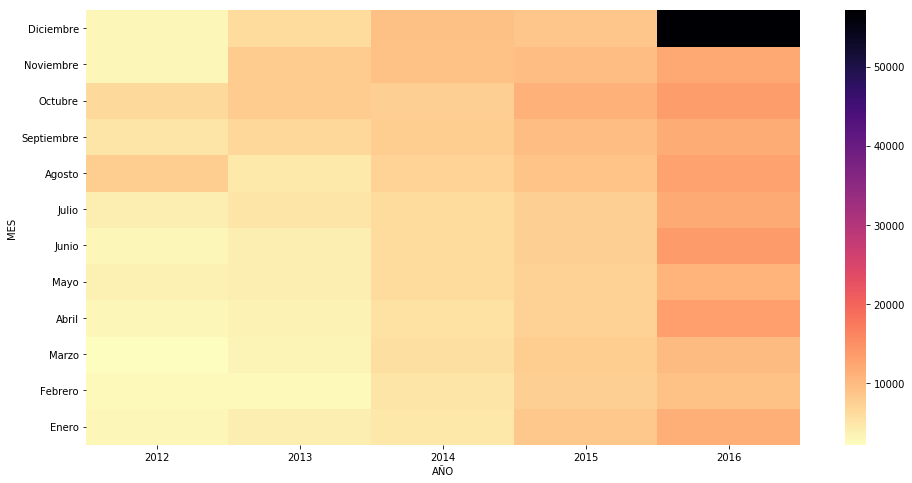

In [28]:
import matplotlib.pyplot as plt
ventas = fechas1.groupby(['año', 'mes']).agg(np.size).reset_index()
pivoted = pd.pivot_table(ventas, values=0, columns='año', index='mes')
fig, ax = plt.subplots(figsize=(16,8))
g = sns.heatmap(pivoted,cmap='magma_r')
g.set_xlabel('AÑO')
g.set_ylabel('MES')
g.invert_yaxis()
g.set_yticklabels(labels=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'], rotation=0)
g

Se puede observar que la mayor cantidad de ventas se dio en el mes de diciembre del año 2016. Este mismo año fue el que mayor actividad tuvo en ese sentido. Se podría también analizar que las ventas fueron aumentando progresivamente a lo largo de los años, excepto por el periodo Agosto-Octubre del año 2012.